In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start='2010-01-01'
end='2022-12-31'

stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...,...
3267,2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
3268,2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
3269,2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600
3270,2022-12-29,87.029999,89.364998,86.989998,88.949997,88.949997,18280700


In [6]:
ma_100_days=data.Close.rolling(100).mean()

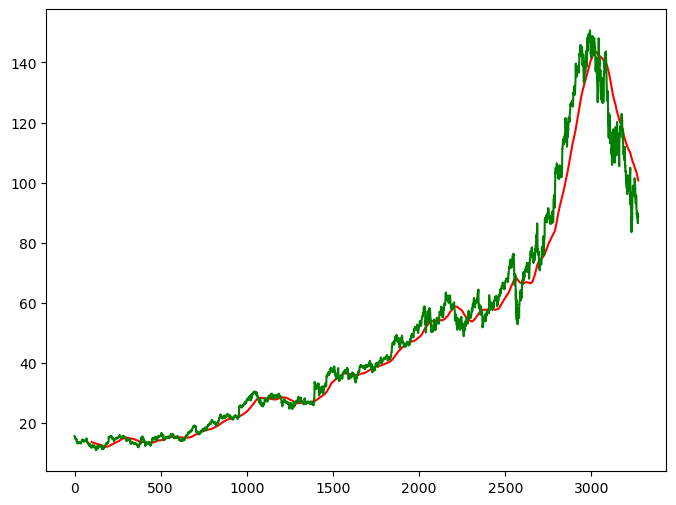

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
ma_200_days=data.Close.rolling(200).mean()

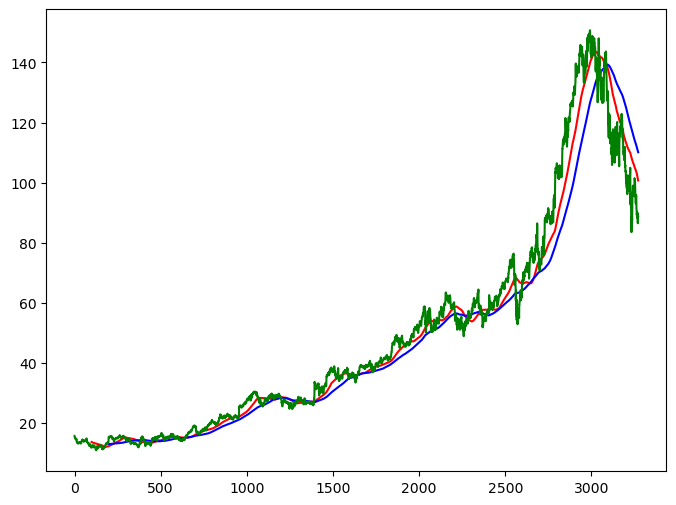

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [15]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [16]:
data_train.shape[0]

2617

In [17]:
data_test.shape[0]

655

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_train_scale=scaler.fit_transform(data_train)

In [25]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [26]:
x,y=np.array(x),np.array(y)

In [27]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

model.compile(optimizer='adam' loss='mean_squared_error')

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [32]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50

79/79 [==============================] - 32s 275ms/step - loss: 0.0298
Epoch 2/50
79/79 [==============================] - 21s 265ms/step - loss: 0.0071
Epoch 3/50
79/79 [==============================] - 21s 265ms/step - loss: 0.0075
Epoch 4/50
79/79 [==============================] - 21s 266ms/step - loss: 0.0062
Epoch 5/50
79/79 [==============================] - 21s 263ms/step - loss: 0.0050
Epoch 6/50
79/79 [==============================] - 21s 267ms/step - loss: 0.0047
Epoch 7/50
79/79 [==============================] - 21s 263ms/step - loss: 0.0041
Epoch 8/50
79/79 [==============================] - 21s 262ms/step - loss: 0.0046
Epoch 9/50
79/79 [==============================] - 21s 264ms/step - loss: 0.0044
Epoch 10/50
79/79 [==============================] - 21s 261ms/step - loss: 0.0043
Epoch 11/50
79/79 [==============================] - 21s 264ms/step - loss: 0.0043
Epoch 12/50
79/79 [==============================] - 21s 266ms/step - loss: 0.0039
Epoch 13/50


In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [34]:
pas_100_days=data_train.tail(100)

In [35]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [37]:
data_test_scale=scaler.fit_transform(data_test)

In [39]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
    
x,y=np.array(x),np.array(y)

In [40]:
y_predict=model.predict(x)

21/21 [==============================] - 4s 113ms/step


In [45]:
scale=1/scaler.scale_

In [46]:
y_predict=y_predict*scale

In [47]:
y=y*scale

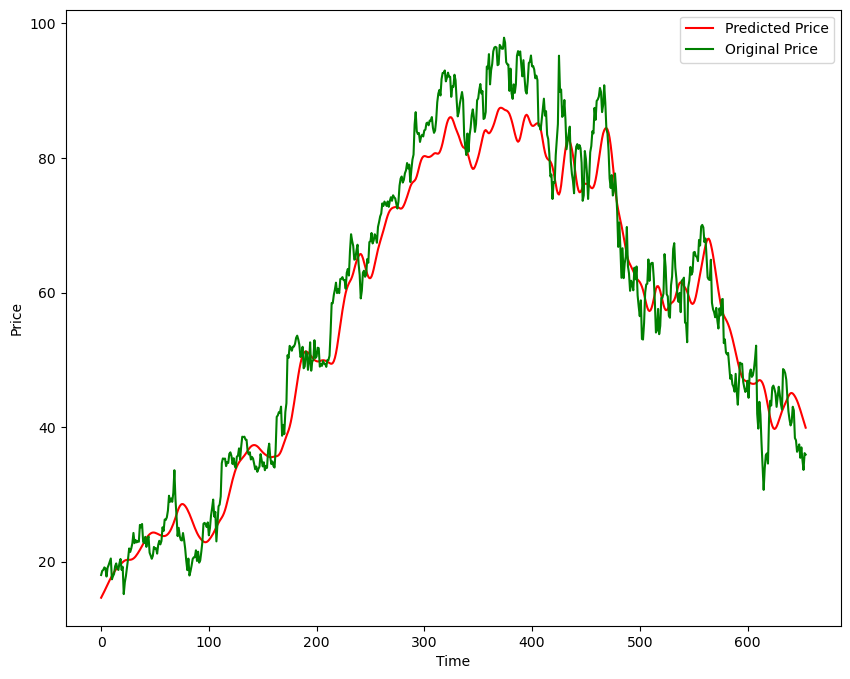

In [48]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [49]:
model.save('Stock Prediction Mode.keras')